In [1]:
from IPython.display import display
from PIL import Image
import os
import itertools

class DogOrCat():
    def __init__(self):
        # 設置attribute
        self.user_input = None
        self.user_img_dir = None
        self.result = None

    def get_user_input(self):
        """取得使用者輸入並且計算結果給出預估"""
        self.user_input = input("請輸入圖片編號(1~20): ")
        # 將使用者輸入轉換成整數
        try :
            self.user_input = int(self.user_input)
            if self.user_input < 1 or self.user_input > 20:
                print("請輸入1~20之間的'數字'!")
                self.get_user_input()
        except ValueError:
            print("請輸入1~20之間的'數字'!")
            self.get_user_input()
        # 設定圖片路徑
        self.user_img_dir = f"./test/pic{self.user_input}.jpg"
        # 顯示圖片
        with Image.open(self.user_img_dir) as image:
            display(image)
        # 比對圖片
        self.result = self.compare_images(self.user_img_dir)
        print(self.result)
        # 給出預估
        self.from_result_get_prediction()

    def calculate_similarity(self, img1: Image, img2: Image):
        """計算兩張圖片的相似度"""
        # 將圖片大小統一
        img1 = img1.resize((256, 256))  
        img2 = img2.resize((256, 256))

        img1 = img1.convert("RGB")
        img2 = img2.convert("RGB")

        pixels1 = img1.load()
        pixels2 = img2.load()
        # 初始化計算差異
        diff_sum = 0

        width, height = img1.size
        # 逐個對比每個像素相減取絕對值
        for x in range(width):
            for y in range(height):
                r1, g1, b1 = pixels1[x, y]
                r2, g2, b2 = pixels2[x, y]

                diff_sum += abs(r1 - r2) + abs(g1 - g2) + abs(b1 - b2)

        return diff_sum

    def compare_images(self, reference_image_path):
        """比對所有照片並且取得最相似的前五名"""
        #  使用dictionary紀錄相似度
        similarity_results = {}
        # 讀取參考圖片
        with Image.open(reference_image_path) as reference_img:
            # 讀取所有狗的參考照片
            for file_name in os.listdir("reference/dogs"):
                if file_name.endswith(('.jpg', '.png', '.jpeg')):  
                    # 提取照片絕對路徑
                    img_path = os.path.join("reference/dogs", file_name)
                    with Image.open(img_path) as comparison_img:
                        # 計算相似度
                        similarity_score = self.calculate_similarity(reference_img, comparison_img)
                        similarity_results[file_name] = similarity_score
            # 一樣流程操作貓的照片
            for file_name in os.listdir("reference/cats"):
                if file_name.endswith(('.jpg', '.png', '.jpeg')):  
                    img_path = os.path.join("reference/cats", file_name)
                    with Image.open(img_path) as comparison_img:
                        similarity_score = self.calculate_similarity(reference_img, comparison_img)
                        similarity_results[file_name] = similarity_score
            # 排序並取得前五名
            sorted_results = sorted(similarity_results.items(), key=lambda x: x[1])
            first_five_results = dict(itertools.islice(sorted_results, 5))
            return first_five_results

    def from_result_get_prediction(self):
        """從比對結果取得預測"""
        dogs = 0
        cats = 0
        # 統計前五名中狗和貓的數量
        for key in self.result.keys():
            if key.startswith("dog"):
                dogs += 1
            elif key.startswith("cat"):
                cats += 1
        # 判斷是狗還是貓
        if dogs > cats:
            return print("這是一隻狗")
        else:
            return print("這是一隻貓")

    def iter_through_all_test(self, num):
        """將1~20依序比對並且取得預測"""
        self.user_input = num
        try:
            self.user_input = int(self.user_input)
            if self.user_input < 1 or self.user_input > 20:
                print("請輸入1~20之間的'數字'!")
                self.get_user_input()
        except ValueError:
            print("請輸入1~20之間的'數字'!")
            self.get_user_input()
        self.user_img_dir = f"./test/pic{self.user_input}.jpg"
       
        with Image.open(self.user_img_dir) as image:
            display(image)

        self.result = self.compare_images(self.user_img_dir)
        print(self.result)
        self.from_result_get_prediction()
        

建立class DogOrCat，並且設置methods: 
get_user_input: 取得使用者輸入並且計算結果給出預估
calculate_similarity: 計算兩張圖片的相似度
compare_images: 比對所有照片並且取得最相似的前五名
from_result_get_prediction: 從比對結果取得預測
iter_through_all_test: 將1~20依序比對並且取得預測

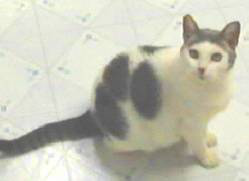

{'dog.23.jpg': 8402048, 'cat.32.jpg': 10586396, 'cat.36.jpg': 11442075, 'cat.13.jpg': 11704259, 'dog.26.jpg': 11784078}
這是一隻貓


In [4]:
# 建立物件
dogOrCat = DogOrCat()
#並且取得使用者輸入
dogOrCat.get_user_input()

使用物件並且取得使用者輸入


判斷誤差之原因討論:
由於是比較像素值之差異，黑貓與黑狗之像似度會高於黑貓與白貓之相似度。
若動物主體不占在正中央或是主體占比太小，則會造成比較位置誤差，進而導致相似度下降。